#Лабораторная работа №4

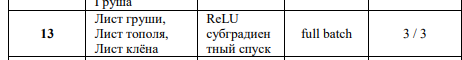

In [ ]:
import numpy as np
from random import random
import math
import os
from os import listdir
from PIL import Image
import matplotlib.pyplot as plt
from random import uniform as uniform
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
network_layer = 4
neuron_count = [32, 24, 16, 3]

In [ ]:
'''#Гиперболический тангенс
def activate(x):
  return math.tanh(x)

In [ ]:
'''#Производная от гиперболической функции
def dy_activate(x):
  return 1/ math.cosh(x) ** 2

In [ ]:
#Сигмовидная функция активации
def activate(x):
  return 1 / (1 + math.pow(math.e, -x))

In [ ]:
#Relu функция активации
def Rely_activate(x):
  return max(0.0, x)

In [ ]:
#Производная от Relu 
def Rely_dy_activate(x):
  if(x >= 0):
    return 1
  else:
    return 0

In [ ]:
#Производная от сигмоидной фукции
def dy_activate(x):
  return activate(x) * (1 - activate(x))

#Функция для работы с картинками

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
classA = 0
classB = 2
classC = 3

In [ ]:
from keras.datasets import fashion_mnist

(x_train_fashion , y_train_fashion), (x_test_fashion , y_test_fashion) = fashion_mnist.load_data()
#x_data = np.concatenate((x_train_fashion, x_test_fashion))
#y_data = np.concatenate((y_train_fashion, y_test_fashion))

In [ ]:
train_filter = np.where((y_train_fashion == classA) | (y_train_fashion == classB) | (y_train_fashion == classC))
test_filter = np.where((y_test_fashion == classA) | (y_test_fashion == classB) | (y_test_fashion == classC))

x_train , y_train = x_train_fashion[train_filter] , y_train_fashion[train_filter]
x_test , y_test = x_test_fashion[test_filter] , y_test_fashion[test_filter]

x_train , y_train = x_train[:65] , y_train[:65]
x_test, y_test = x_test[:15], y_test[:15]

print('x_train: ' , x_train.shape)
print('y_train: ' , y_train.shape)
print('x_test: ' , x_test.shape)
print('y_test: ' , y_test.shape)

x_train:  (65, 28, 28)
y_train:  (65,)
x_test:  (15, 28, 28)
y_test:  (15,)


In [ ]:
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
def OutputImage(x_value, y_value):
  plt.figure(figsize = (15, 6))
  for i in range(27):
    plt.subplot(3 , 9 , i + 1)
    plt.imshow(x_value[i] , cmap = "gray")
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
  plt.show()

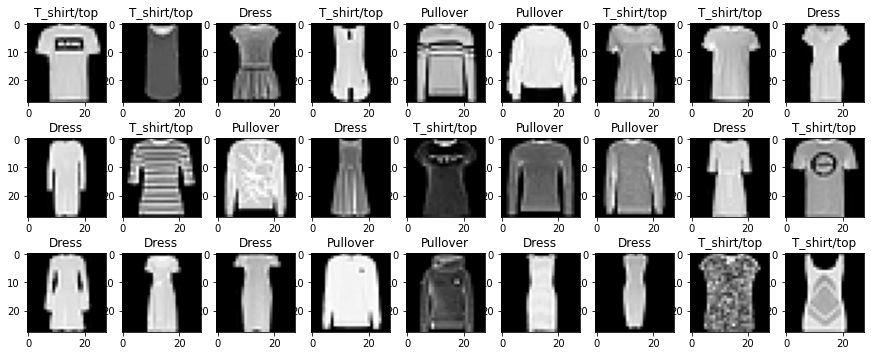

In [ ]:
OutputImage(x_train, y_train)

In [ ]:
#Нормализация картинок
x_train = np.array(x_train , np.float32).reshape([-1 , 784]) / 255.0
x_test = np.array(x_test , np.float32).reshape([-1 , 784]) / 255.0

#Добавляем 1 в качестве bias
x_train = ([np.append(x_train[i], 1) for i in range(len(x_train))])
x_test = ([np.append(x_test[i], 1) for i in range(len(x_test))])

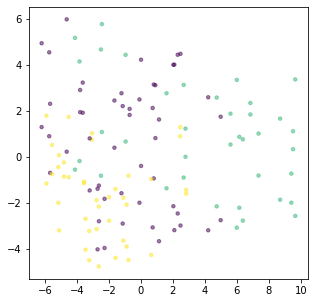

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca_reduce = pca.fit_transform(x_train)

pca_x1 = pca_reduce[:, 0]
pca_x2 = pca_reduce[:, 1]
pca_x3 = pca_reduce[:, 2]

plt.figure(figsize=(5, 5))
plt.scatter(pca_x1 , pca_x2, s = 12 , c = y_train , alpha = 0.5)
plt.scatter(pca_x1 , pca_x3, s = 12 , c = y_train , alpha = 0.5)

#Функция для работы с dataset

In [ ]:
def mini_batch(x_data, y_data):
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.20, stratify=y)
  
  print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
  print(f"Количество строк в y_test по классам: {np.bincount(y_test)}") 
  return x_train, y_train, x_test, y_test

In [ ]:
def fullBatch(x_data, y_data):
  return x_data, y_data

In [ ]:
def rename_y_value(y_value):
  new_mark = []
  for i in range(len(y_value)):
    if(y_value[i] == 0):
      new_mark.append([1, 0, 0])
    elif(y_value[i] == 2):
      new_mark.append([0, 1, 0])
    else:
      new_mark.append([0, 0, 1])
  return new_mark

#Функции для работы с весами

In [ ]:
#Функция вывода весов
def printWeight(weights, network_layer, neuron_count):
  for i in range(network_layer):
    print("Layer --------------------- {0}".format(i + 1))
    for j in range(neuron_count[i]):
      print("Neuron - {0}".format(j + 1))
      print(weights[i][j])

In [ ]:
#Функция генерирования рандомных весов
def generate_weight(size_of_first_layer, neuron_count):
  weights = []
  for i in range(network_layer):
    weight_layer = []
    for j in range(neuron_count[i]):
      weight_neuron = []

      if(i == 0):
        for m in range(size_of_first_layer):
          weight_neuron.append(uniform(-0.5, 0.5))
      else:
        for m in range(neuron_count[i - 1] + 1):
          weight_neuron.append(uniform(-0.5, 0.5))
      weight_layer.append(weight_neuron)
    weights.append(weight_layer)
  return weights

In [ ]:
weights = generate_weight(len(x_train[0]), neuron_count)
print(printWeight(weights, network_layer, neuron_count))

Layer --------------------- 1
Neuron - 1
[0.1829799283816027, 0.2938731657296063, 0.19633371489488916, 0.16401834177071462, 0.19099924525428924, 0.1120096567292389, 0.22695873239544495, 0.2738164229120601, 0.2448919069320823, 0.2730025015306713, 0.046588848244570435, -0.19314142566668402, 0.48477251110502695, -0.24226563827732883, 0.15580412494855944, 0.04750241673936628, -0.11407025377215074, 0.24494256402149084, -0.12959243152262334, 0.09123960371286766, -0.10372891331246059, -0.1970956768113291, -0.46847308770949236, 0.08530458141089425, -0.018865421880570277, 0.2578008478421252, 0.38236010306768964, -0.10738009101863855, -0.38615132930611673, -0.1125586295979768, 0.3967458476076602, 0.3460539090018929, -0.2911841053652341, -0.38686142320867445, -0.1987370188833142, 0.2777362097911751, 0.23491396491597893, 0.12004171663186891, -0.23309153060533028, 0.2857749889279112, 0.305945960610465, 0.2821290143163494, 0.4811332597351009, 0.41170596647629976, -0.1722282265920988, 0.1861341584834

In [ ]:
#Функция копирования значений весов
def weights_copy(weights):
  weights_copy = []
  for i in range(len(weights)):
    weights_layer = []
    for j in range(len(weights[i])):
      weights_neuron = []
      for m in range(len(weights[i][j])):
        weights_neuron.append(weights[i][j][m])
      weights_layer.append(weights_neuron)
    weights_copy.append(weights_layer)
  return weights_copy

In [ ]:
weights_bp = weights_copy(weights)

#Функция predict

In [ ]:
def predict2_0(weights, x_train, bias):
  output_value_by_every_layer = []
  input_value_by_every_layer = []
  for i in range(len(weights)):
    input_value_of_layer = []
    output_value_of_layer = []

    for j in range(len(weights[i])):
      output_value_neuron = 0

      if(i == 0):
        input_value_neuron = np.dot(weights[i][j], x_train)
      else:
        input_value_neuron = np.dot(weights[i][j], output_value_by_every_layer[i - 1])
      
      if(i != len(weights) - 1):
        output_value_neuron = Rely_activate(input_value_neuron)
      else:
        output_value_neuron = activate(input_value_neuron)
      output_value_of_layer.append(output_value_neuron)
      input_value_of_layer.append(input_value_neuron)

    if(i != len(weights) - 1):
      output_value_of_layer.append(bias)

    input_value_by_every_layer.append(input_value_of_layer)
    output_value_by_every_layer.append(output_value_of_layer)

    '''print("Layer {0}".format(i + 1))
    print("Input value")
    print(input_value_of_layer)
    print("Output value")
    print(output_value_of_layer)'''

  return input_value_by_every_layer, output_value_by_every_layer

In [ ]:
y_train = rename_y_value(y_train)
y_test = rename_y_value(y_test)

print(y_test)
print(y_train)

[[0, 1, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0]]
[[1, 0, 0], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [1, 0, 0], [1, 0, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0]]


In [ ]:
inp, out = predict2_0(weights_bp, x_train[0], 1)
print(out[2])

[0.0, 1.6110675545166335, 4.058970936783355, 0.0, 3.550638159432486, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12924776135635668, 0.0, 1.8709454810938047, 0.0, 0.0, 1]


#Функции Acc, Loss, вывода y-предсказанного

In [ ]:
#Функция расчета значений потери между y-предсказанным и y-тестовым
def err_loss(x, y, weights, bias):
  loss = 0
  last = len(weights) - 1
  for i in range(len(x)):
    y_inp, y_out = predict2_0(weights, x[i], bias)
    for j in range(len(y_out[last])):
      #loss += np.square(y_out[last][y[i].index(max(y[i]))] - max(y[i]))
      loss += np.square(y_out[last][j] - y[i][j])
  loss = np.sqrt(loss) / len(x)
  return loss

In [ ]:
#Функция расчета hitrate
def err_acc(x, y, weights, eps, bias):
  hit = 0
  out = 0
  last = len(weights) - 1
  for i in range(len(x)):
    y_inp, y_out = predict2_0(weights, x[i], bias)
    if(y_out[last].index(max(y_out[last])) == y[i].index(max(y[i]))):
        hit = hit + 1
  return hit / len(x)

In [ ]:
#Функция вывода значений y-предсказанных
def y_out_print(weights, x_test, bias):
  last = len(weights) - 1
  print("y_out: ")
  for i in range(len(x_test)):
    y_predict_input, y_predict_output = predict2_0(weights, x_test[i], bias)
    print(y_predict_output[last])
  print("-----------------------------")

#Back propogation

In [ ]:
def back_Propogation2_0(weights, epoch, a, x_train, y_train, x_test, y_test, bias):
  sigma_list = []
  for i in range(len(weights)):
    any_list = []
    for j in range(len(weights[i])):
      any_list.append(0)
    sigma_list.append(any_list)

  last_index = len(weights) - 1
  error = 0
  array_loss = []
  array_acc = []
  for i in range(epoch):
    print("Эпоха №{0}".format(i+ 1))
  
    for j in range(len(x_train)):
      input_value, output_value = predict2_0(weights, x_train[j], bias)
      #print("Веса до: ")
      #print(printWeight(weights, network_layer, [8, 4, 3]))
      #print("y_predict: {0}".format(output_value[last_index]))
      #print("y_true: {0}".format(y_train[j]))
     
      #Выходные нейроны
      for p in range(len(output_value[last_index])):
        error = y_train[j][p] - output_value[last_index][p]
        g = dy_activate(input_value[last_index][p]) * error
        sigma_list[last_index][p] = g
        
        for m in range(len(weights[last_index][p])):
          weights[last_index][p][m] += a * g * output_value[last_index - 1][p]

      #Скрытый слой
      for p in range(last_index - 1, -1, -1):
        for m in range(len(weights[p])):
          sigma = 0
          for k in range(len(weights[p + 1])):
            sigma += weights[p + 1][k][m] * sigma_list[p + 1][k]
          g = sigma * Rely_dy_activate(input_value[p][m])
          sigma_list[p][m] = g

          if(p == 0):
            for k in range(len(weights[p][m])):
              weights[p][m][k] += g * a * x_train[j][k]
          else:
            for k in range(len(weights[p][m])):
              weights[p][m][k] += g * a * output_value[p - 1][k]
      #print("После: ")
      #print(printWeight(weights, network_layer, [8, 4, 3]))

    loss = err_loss(x_test, y_test, weights, bias)
    array_loss.append(loss)
    acc = err_acc(x_test, y_test, weights, 0.1, bias)
    array_acc.append(acc)
    print("Loss: {0}".format(loss))
    print("Acc: {0}".format(acc))

    #print("True: {0}".format(y_test))
    #y_out_print(weights, x_test, bias)

  return weights, array_loss, array_acc

In [ ]:
weights_bp, array_loss_bp, array_acc_bp = back_Propogation2_0(weights_bp, 250, 0.01, x_train, y_train, x_test, y_test, 1)

Эпоха №1
Loss: 0.13913370005504058
Acc: 0.7333333333333333
Эпоха №2
Loss: 0.14041289595381776
Acc: 0.7333333333333333
Эпоха №3
Loss: 0.13765602703474492
Acc: 0.7333333333333333
Эпоха №4
Loss: 0.13691212112279805
Acc: 0.7333333333333333
Эпоха №5
Loss: 0.13788644627326668
Acc: 0.7333333333333333
Эпоха №6
Loss: 0.13435453801892017
Acc: 0.7333333333333333
Эпоха №7
Loss: 0.1336262984942836
Acc: 0.7333333333333333
Эпоха №8
Loss: 0.13206840544887424
Acc: 0.7333333333333333
Эпоха №9
Loss: 0.1299696847685823
Acc: 0.8
Эпоха №10
Loss: 0.13054308266892117
Acc: 0.8
Эпоха №11
Loss: 0.13038853551717858
Acc: 0.8
Эпоха №12
Loss: 0.12729220120275692
Acc: 0.8
Эпоха №13
Loss: 0.12872487035444055
Acc: 0.8
Эпоха №14
Loss: 0.12713006855910394
Acc: 0.8
Эпоха №15
Loss: 0.1265980267284646
Acc: 0.8
Эпоха №16
Loss: 0.12548646660145302
Acc: 0.8
Эпоха №17
Loss: 0.12359420762021003
Acc: 0.8
Эпоха №18
Loss: 0.12293380874331175
Acc: 0.8
Эпоха №19
Loss: 0.1211936052230625
Acc: 0.8
Эпоха №20
Loss: 0.12255487558803611
Ac

Text(0, 0.5, 'Accuracy')

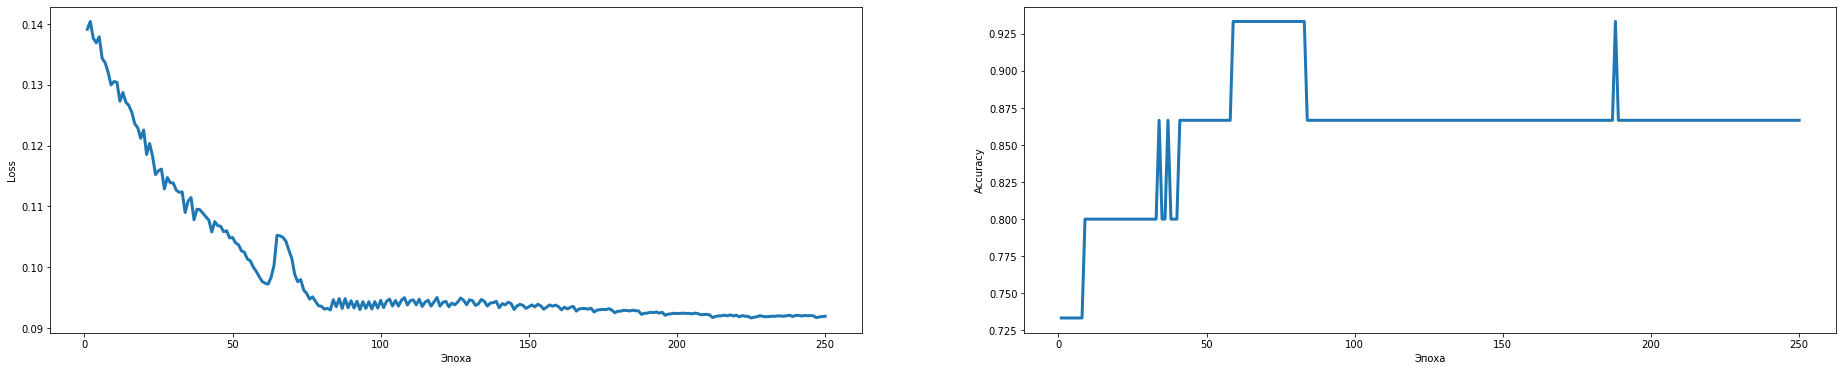

In [ ]:
plt.figure(figsize = (32, 6))
plt.subplot(1,2,1)
plt.plot(range(1 , len(array_loss_bp) + 1, 1), array_loss_bp, linewidth = 3)
plt.xlabel("Эпоха")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(range(1 , len(array_acc_bp) + 1, 1), array_acc_bp, linewidth = 3)
plt.xlabel("Эпоха")
plt.ylabel("Accuracy")